# Network data scientists in California
**Author: Abdouh Harouna Kenfack**

### Dataset Description
* This is network represents the colaboration betweeen Network Datascientist in California.


* This is an unweighted and undirected network


* Dataset format
    * SOURCE, TARGET
    
    
* Nodes: 379


* Edges: 914


### Importing some libraries

In [1]:
#pip install graspologic

In [2]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
# pip install decorator==5.0.9
from scipy.sparse import csr_matrix
import numpy as np
#import graspologic as gs
import pandas as pd

In [3]:
import graspologic

In [4]:
#Navigating to my notebook
#cd /content/drive/MyDrive/Colab Notebooks/Network-DataScience

In [4]:
G = nx.read_edgelist("ca-netscience.txt")
#nx.draw_networkx(G)
nodelist = list(G.nodes)
A_Sparse = nx.to_scipy_sparse_matrix(G, nodelist) # Sparse matrix

A_Dense = nx.to_numpy_array(G, nodelist) # Dense Matrix

### Heat Map of entire network!


<AxesSubplot:>

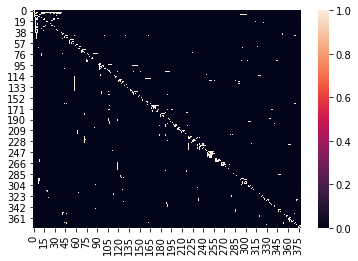

In [5]:
import seaborn as sns

sns.heatmap(A_Dense)

<AxesSubplot:>

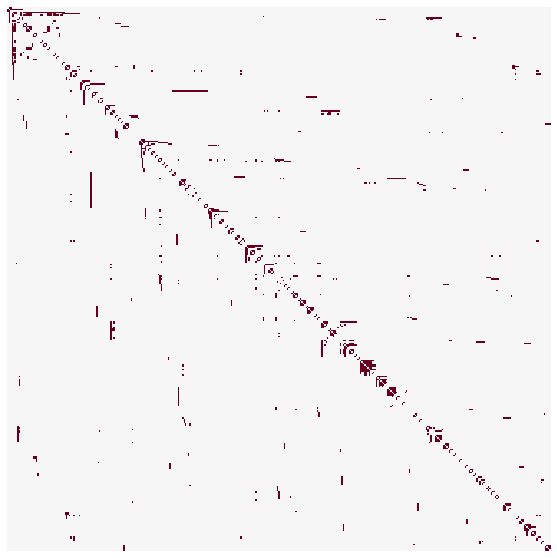

In [7]:
from graspologic.plot import heatmap

heatmap(A_Dense, cbar=False)

### Graphical layout of network



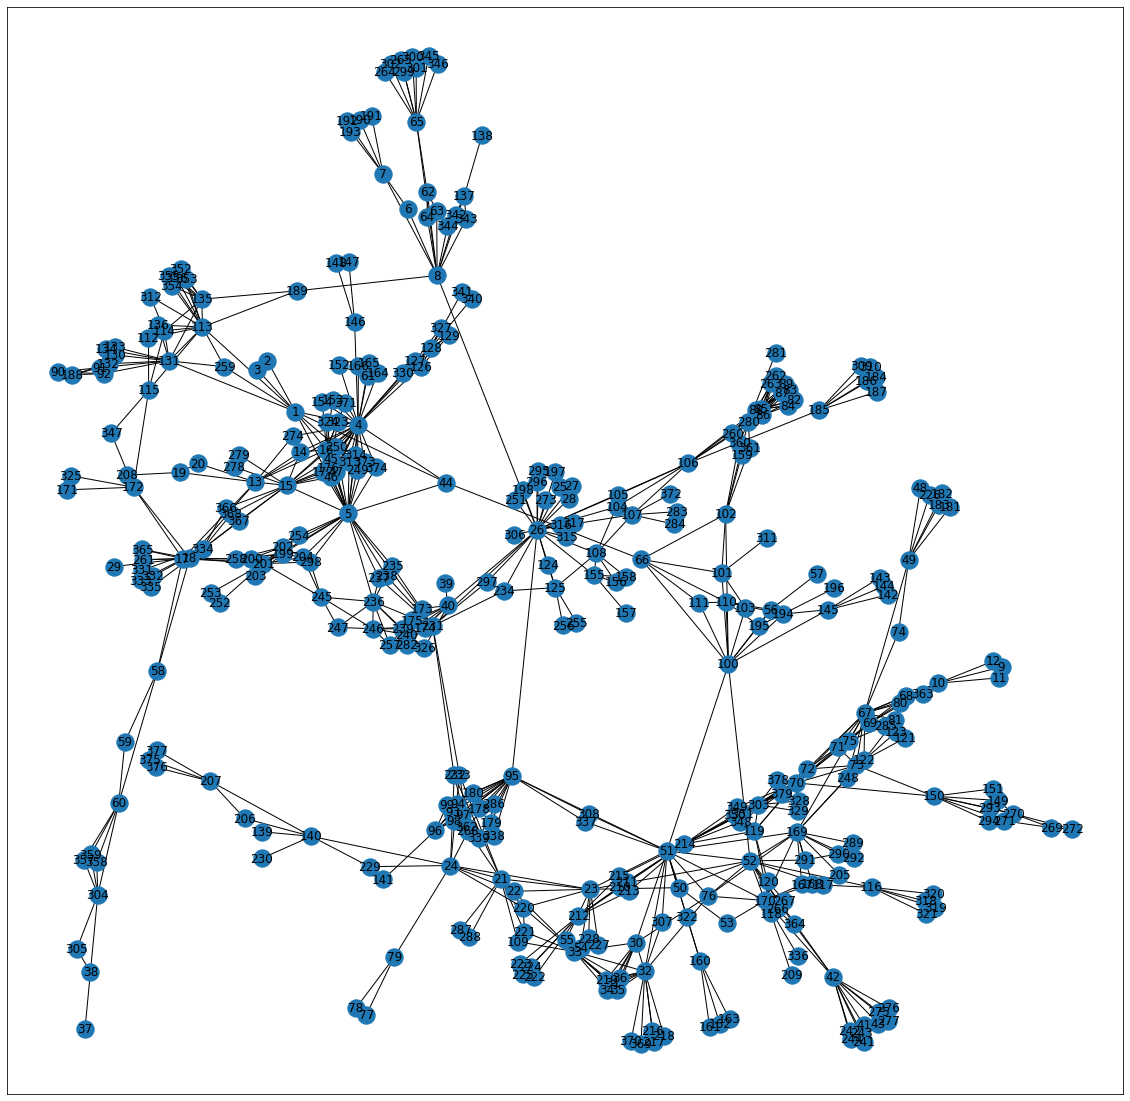

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
nx.draw_networkx(G, ax=ax)

### Node Analysis
### Modularity


In [9]:
def map_to_nodes(node_map):
    node_map.setdefault(0)
    # utility function to make it easy to compare dicts to array outputs
    return np.array(np.vectorize(lambda x: node_map.setdefault(x, 0))(nodelist))

In [10]:
map_to_nodes(dict(nx.eigenvector_centrality(G)))

array([1.48382672e-02, 1.39115522e-01, 1.48382672e-02, 4.14298692e-01,
       3.56207610e-01, 3.46449843e-01, 8.85522193e-02, 2.22464490e-02,
       2.13003615e-02, 1.47050164e-01, 1.76052647e-02, 1.20977984e-01,
       1.09630675e-01, 2.55742521e-01, 2.36954156e-01, 2.18244351e-01,
       2.18244351e-01, 5.61725592e-02, 6.06982816e-02, 6.06982816e-02,
       6.18583023e-02, 4.07688406e-02, 3.99306209e-02, 8.11425010e-02,
       8.11425010e-02, 5.61725592e-02, 5.61725592e-02, 5.61725592e-02,
       2.18244351e-01, 2.18244351e-01, 1.07653647e-01, 5.15906274e-02,
       1.34820719e-01, 1.34820719e-01, 1.06416363e-01, 1.06416363e-01,
       5.75929460e-02, 7.33218874e-02, 1.15887671e-01, 8.54317807e-02,
       5.89546347e-02, 7.53145489e-02, 5.89546347e-02, 6.03662239e-02,
       6.55422806e-02, 4.06488868e-02, 6.15821576e-02, 5.15530587e-02,
       5.15530587e-02, 4.15906815e-02, 5.00009823e-02, 1.76430795e-04,
       1.68976712e-04, 1.57628479e-03, 2.29691747e-05, 1.92262521e-05,
      

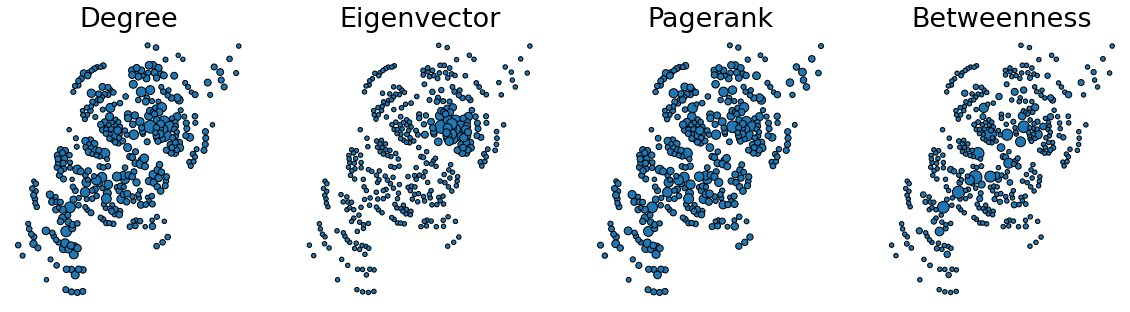

In [62]:
A = A_Dense
g = G

import pandas as pd
import matplotlib.pyplot as plt
from graspologic.plot import networkplot
import seaborn as sns
from matplotlib import colors

node_data = pd.DataFrame(index=g.nodes())
node_data["degree"] = node_data.index.map(dict(nx.degree(g)))
node_data["eigenvector"] = node_data.index.map(nx.eigenvector_centrality(g))
node_data["pagerank"] = node_data.index.map(nx.pagerank(g))
node_data["betweenness"] = node_data.index.map(nx.betweenness_centrality(g))

pos = nx.kamada_kawai_layout(g)
node_data["x"] = [pos[node][0] for node in node_data.index]
node_data["y"] = [pos[node][1] for node in node_data.index]

sns.set_context("talk", font_scale=1.5)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))


def plot_node_scaled_network(A, node_data, key, ax):
    # REF: https://github.com/mwaskom/seaborn/blob/9425588d3498755abd93960df4ab05ec1a8de3ef/seaborn/_core.py#L215

    levels = list(np.sort(node_data[key].unique()))
    cmap = sns.color_palette("Blues", as_cmap=True)
    vmin = np.min(levels)
    norm = colors.Normalize(vmin=0.3 * vmin)
    palette = dict(zip(levels, cmap(norm(levels))))

    networkplot(
        A,
        node_data=node_data,
        x="x",
        y="y",
        ax=ax,
        edge_linewidth=1.0,
        node_size=key,
#         node_hue=key,
        palette=palette,
        node_sizes=(20, 200),
        node_kws=dict(linewidth=1, edgecolor="black"),
        node_alpha=1.0,
        edge_kws=dict(color=sns.color_palette()[0])
    )

    ax.axis("off")
    ax.set_title(key.capitalize())


ax = axs[0]
plot_node_scaled_network(A_Dense, node_data, "degree", ax)

ax = axs[1]
plot_node_scaled_network(A_Dense, node_data, "eigenvector", ax)

ax = axs[2]
plot_node_scaled_network(A_Dense, node_data, "pagerank", ax)

ax = axs[3]
plot_node_scaled_network(A_Dense, node_data, "betweenness", ax)

fig.set_facecolor("w")

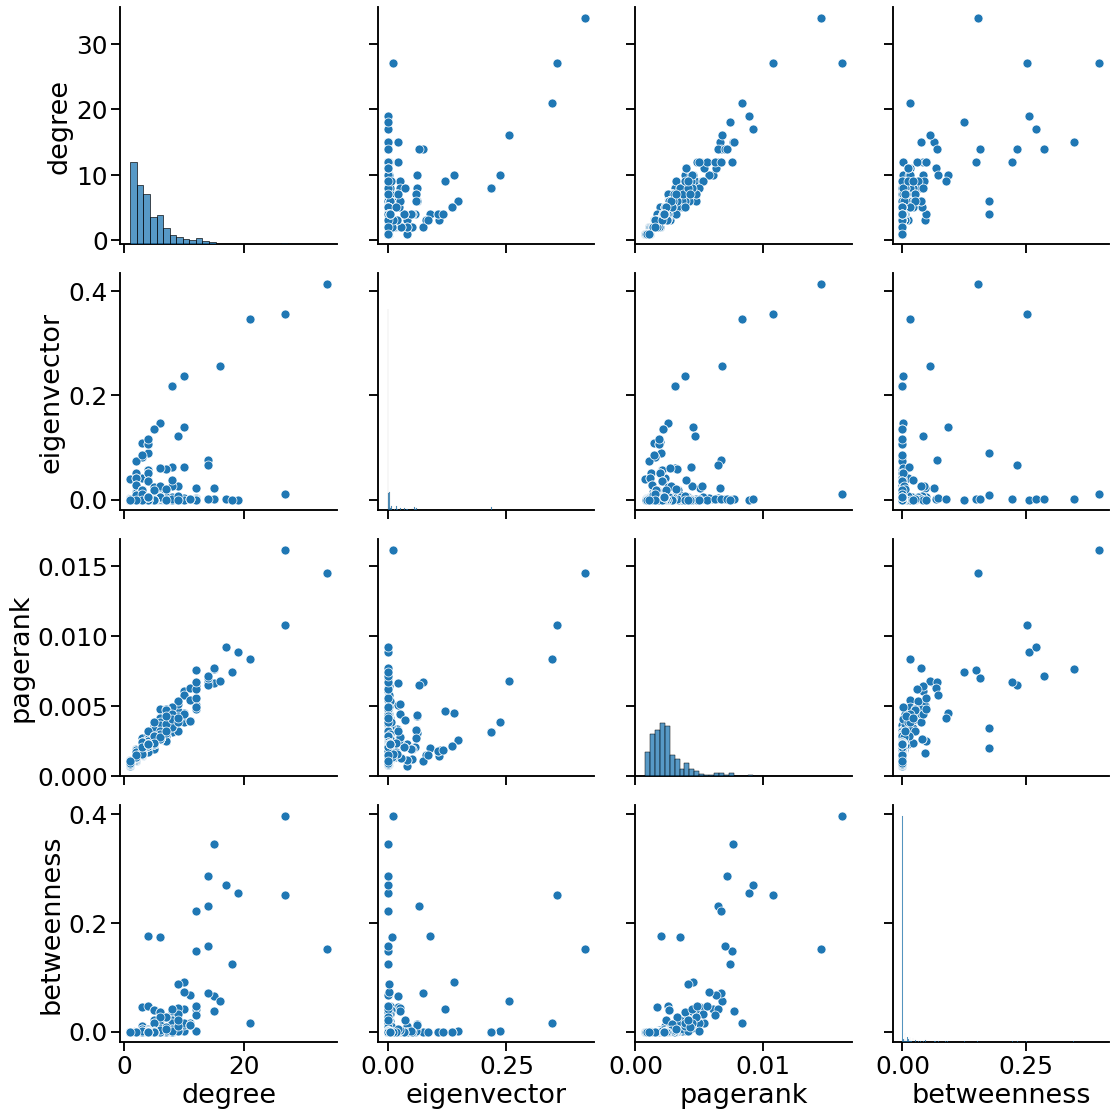

In [13]:
sns.pairplot(node_data, vars=['degree', 'eigenvector', 'pagerank', 'betweenness'], height=4)

<AxesSubplot:xlabel='x', ylabel='y'>

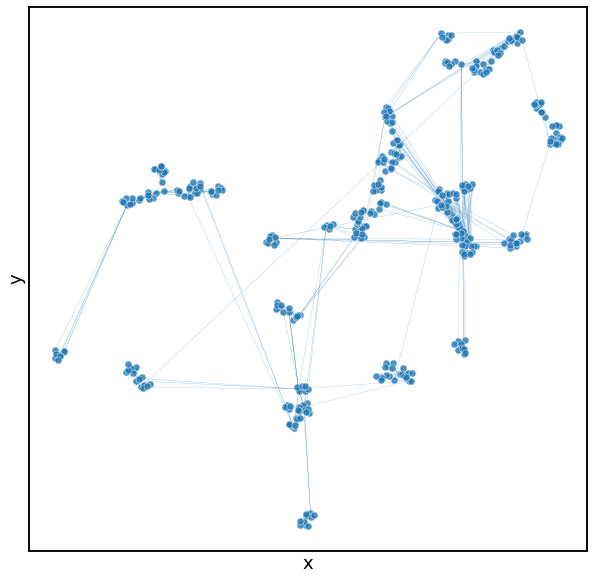

In [16]:
# A_ptr = gs.utils.pass_to_ranks(A_unDense)  # can skip for an unweighted network
A_sparse = csr_matrix(A_Dense)

n_components = 15
ase = graspologic.embed.AdjacencySpectralEmbed(n_components=n_components, check_lcc=False)
ase_embedding = ase.fit_transform(A_sparse)

from umap import UMAP

umapper = UMAP(n_neighbors=15, metric="cosine", min_dist=0.8)
umap_embedding = umapper.fit_transform(ase_embedding)

graspologic.plot.networkplot(
    A_sparse,
    x=umap_embedding[:, 0],
    y=umap_embedding[:, 1],
    edge_linewidth=0.2,
    edge_alpha=0.4,
    node_kws=dict(
        s=50,  # s will change the size of nodes)
    ),
)

### Community Detection
* Greedy Modularity

In [17]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G))


In [18]:
print('Number of detected communities: ', len(c))

Number of detected communities:  19


In [20]:
from graspologic.utils import largest_connected_component

A_lcc = largest_connected_component(A_Dense)
A_lcc.shape

(379, 379)

In [21]:
print("The largest connected network looks like: ", A_lcc)

The largest connected network looks like:  [[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [22]:
node_data

,degree,eigenvector,pagerank,betweenness,x,y
2,2,0.014838,0.001359,0.000000,0.324836,0.368491
1,10,0.139116,0.004539,0.091461,0.243478,0.270726
3,2,0.014838,0.001359,0.000000,0.270921,0.371441
4,34,0.414299,0.014519,0.152056,0.372410,0.143599
5,27,0.356208,0.010773,0.250628,0.256945,0.196155
...,...,...,...,...,...,...
281,1,0.000014,0.001075,0.000000,0.373865,-0.450532
332,4,0.004970,0.002261,0.000000,0.707476,0.034854
331,4,0.004970,0.002261,0.000000,0.718229,0.075693
333,4,0.004970,0.002261,0.000000,0.722604,0.118258


## What Next?

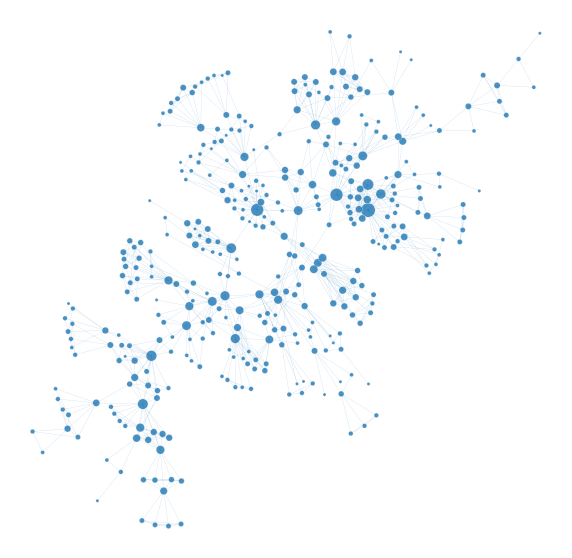

In [24]:
#adj = nx.to_scipy_sparse_matrix(G_un, nodelist=nodelist)
adj = nx.to_numpy_array(G, nodelist=nodelist)

from graspologic.plot import networkplot

node_data["degree"] = np.array(np.sum(adj, axis=1))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = networkplot(
    adj,
    x="x",
    y="y",
    node_data=node_data.reset_index(),
#     node_hue="label",
    node_size="degree",
    node_sizes=(10, 200),
    ax=ax,
    edge_linewidth=0.2,
    edge_alpha=0.2,
)
_ = ax.axis("off")

In [25]:
# adj = pd.read_csv("soc-sign-bitcoinotc.csv", header=None)
adj = nx.to_numpy_array(G, nodelist=nodelist)

In [26]:
from graspologic.embed import node2vec_embed

node2vec_embedding, node_ids = node2vec_embed(
    G,
    dimensions=16,
    num_walks=10,
    walk_length=16,
    inout_hyperparameter=1.0,
    return_hyperparameter=1.0,
    random_seed=8888,
)

/opt/anaconda3/lib/python3.8/site-packages/graspologic/utils/utils.py:1090: UserWarning: Graph has at least one unweighted edge using weight_attribute "weight". Defaulting unweighted edges to "1.0"
  warnings.warn(


In [27]:
A_Dense.shape

(379, 379)

In [28]:
nodesN = list(G.nodes)
len(nodesN)

379

## Community Detection 

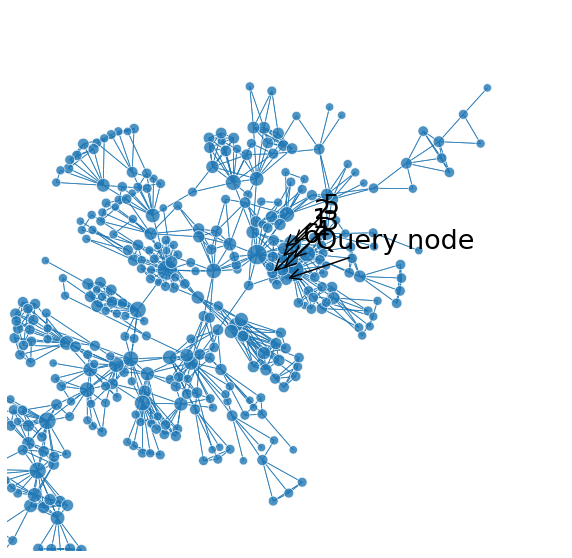

In [31]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=7, metric="euclidean")
nn.fit(node2vec_embedding)

query_node = 15

dists, neighbor_indices = nn.kneighbors(
    node2vec_embedding[query_node, :].reshape(1, -1)
)

neighbor_indices = np.squeeze(neighbor_indices)
neighbor_indices

ax = networkplot(
    adj,
    x="x",
    y="y",
    node_data=node_data.reset_index(),
#     node_hue="label",
    node_size="degree",
    node_sizes=(70, 500),
    edge_linewidth=0.8,
    edge_alpha=0.8,
)
ax.axis("off")


def get_location(node_index):
    return np.array(node_data.iloc[node_index][["x", "y"]])


center = get_location(query_node)
pad = 0.9
ax.set(xlim=(center[0] - pad, center[0] + pad), ylim=(center[1] - pad, center[1] + pad))
_ = ax.figure.set_facecolor("w")


def annotate(node_index, text, ax):
    xy = get_location(node_index)
    ax.annotate(
        text,
        xy,
        xytext=(30, 30),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )


annotate(query_node, "Query node", ax)

for i, node_index in enumerate(neighbor_indices[1:]):
    annotate(node_index, i + 1, ax)

<AxesSubplot:xlabel='x', ylabel='y'>

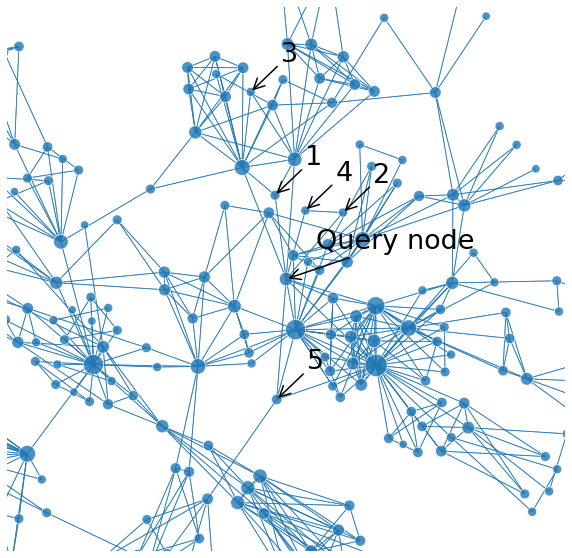

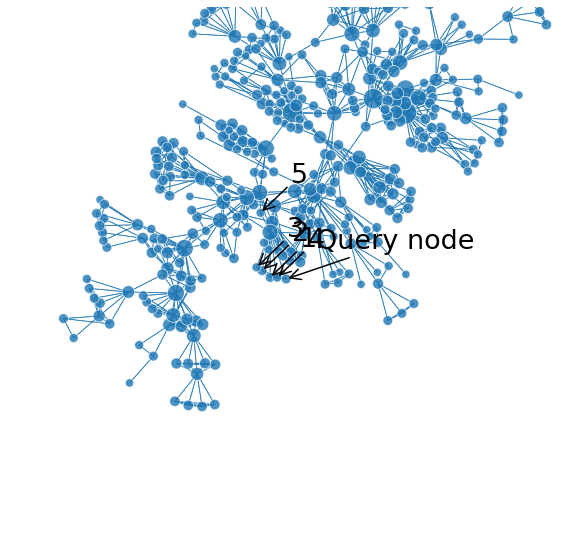

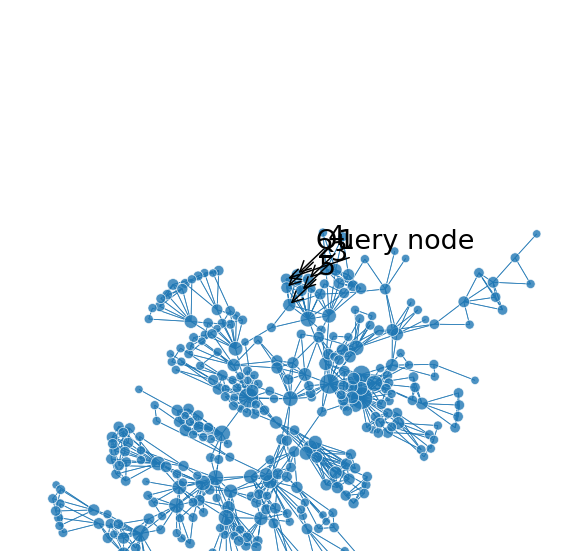

In [33]:
def plot_neighbor_query(query_node, nn, pad=1.0):
    dists, neighbor_indices = nn.kneighbors(
        node2vec_embedding[query_node, :].reshape(1, -1)
    )

    neighbor_indices = np.squeeze(neighbor_indices)

    ax = networkplot(
        adj,
        x="x",
        y="y",
        node_data=node_data.reset_index(),
#         node_hue="label",
        node_size="degree",
        node_sizes=(70, 500),
        edge_linewidth=0.8,
        edge_alpha=0.8,
    )
    ax.axis("off")

    center = get_location(query_node)
    ax.set(
        xlim=(center[0] - pad, center[0] + pad), ylim=(center[1] - pad, center[1] + pad)
    )
    _ = ax.figure.set_facecolor("w")

    annotate(query_node, "Query node", ax)

    for i, node_index in enumerate(neighbor_indices[1:]):
        annotate(node_index, i + 1, ax)

    return ax


nn = NearestNeighbors(n_neighbors=6, metric="euclidean")
nn.fit(node2vec_embedding)

plot_neighbor_query(1, nn, pad=0.4)
plot_neighbor_query(150, nn, pad=1.0)
plot_neighbor_query(300, nn, pad=1.0)

In [193]:
node_data

,degree,eigenvector,pagerank,betweenness,x,y
0,208.0,4.930744e-02,0.000978,0.004392,0.034039,0.037749
1,16.0,4.996216e-03,0.000075,0.000000,0.096296,0.197689
2,2.0,1.408504e-01,0.005041,0.052810,-0.000423,0.053271
3,25.0,9.696629e-03,0.000342,0.000696,0.038740,0.133278
4,60.0,3.898511e-02,0.001374,0.007283,0.069127,0.137994
...,...,...,...,...,...,...
5876,0.0,2.425153e-22,0.000170,0.000000,0.170232,-0.082579
5877,0.0,2.425153e-22,0.000170,0.000000,0.170929,0.081293
5878,0.0,6.706815e-05,0.000045,0.000000,0.609357,-0.125699
5879,0.0,2.717411e-03,0.000052,0.000000,0.378160,0.024618


In [34]:
from graspologic.partition import leiden, modularity
from graspologic.utils import symmetrize, is_symmetric


# A_sym = symmetrize(A_unDense)

leiden_partition_map = leiden(A_Dense, random_seed=7)
type(leiden_partition_map)

dict

In [39]:
leiden_partition_map = leiden(G, random_seed=6)
modularity(G, leiden_partition_map)

0.8478134920444915

In [40]:
node_df = pd.DataFrame(index=nodelist)

In [45]:
def plot_network_partition(adj, node_data, partition_key):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))

    networkplot(
        adj,
        x="x",
        y="y",
        node_data=node_df.reset_index(),
        node_alpha=0.9,
        edge_alpha=0.7,
        edge_linewidth=0.4,
        node_hue=partition_key,
        node_size="degree",
#         edge_hue="source",
        ax=axs[0],
    )
    _ = axs[0].axis("off")

    _ = heatmap(
        adj,
        inner_hier_labels=node_data[partition_key],
        ax=axs[1],
        cbar=False,
        cmap="Purples",
        vmin=0,
        center=None,
        sort_nodes=True,
    )

    return fig, ax

In [46]:
#pos = nx.kamada_kawai_layout(G_unD)
xs = []
ys = []
for node in nodelist:
    xs.append(pos[node][0])
    ys.append(pos[node][1])
xs = np.array(xs)
ys = np.array(ys)

node_df["x"] = xs
node_df["y"] = ys

n = adj.shape[0]

node_df["degree"] = adj.sum(axis=0)

In [48]:
node_df['leiden_partition'] = node_df.index.map(leiden_partition_map)

#plot_network_partition(adj, node_df, 'leiden_partition')

(<Figure size 1080x504 with 4 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

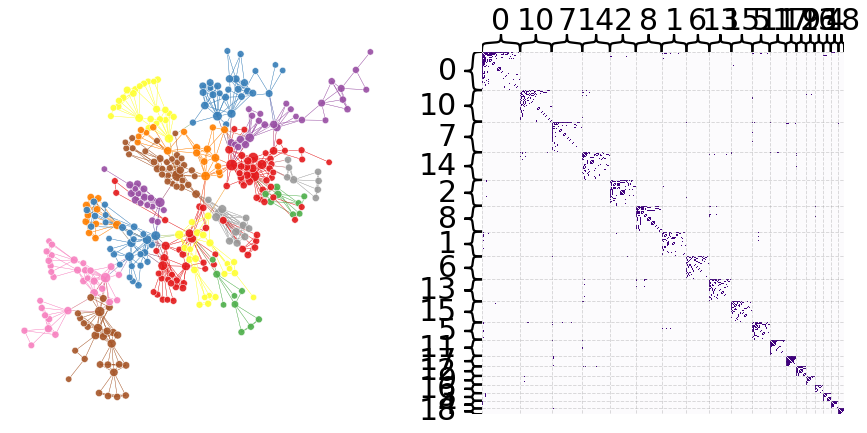

In [50]:
plot_network_partition(adj, node_df, 'leiden_partition')

In [ ]:
# https://networkrepository.com/ca-netscience.php